## Import the libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
%matplotlib inline

## Set the plot properties

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

## Read the files 

In [3]:
mpath = DATA_PATH + "musk.jpg"
musk = cv2.imread(mpath)

mopath = DATA_PATH + "moustache.png"
# Read it with alpha channel
moustache = cv2.imread(mopath,-1)

## Check the dtype, type and Dimensions of the image

In [4]:
print("Data type = {}\n".format(musk.dtype))
print("Object type = {}\n".format(type(musk)))
print("Image Dimensions = {}\n".format(musk.shape))

Data type = uint8

Object type = <class 'numpy.ndarray'>

Image Dimensions = (500, 600, 3)



## Plot Musk's original image

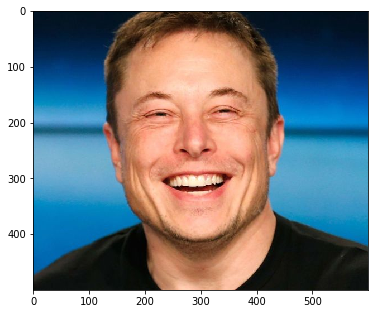

In [5]:
plt.imshow(musk[:,:,::-1])

## See the image properties

In [6]:
print("Data type = {}\n".format(moustache.dtype))
print("Object type = {}\n".format(type(moustache)))
print("Image Dimensions = {}\n".format(moustache.shape))

Data type = uint8

Object type = <class 'numpy.ndarray'>

Image Dimensions = (720, 720, 4)



## Resize the moustache image and import it with alpha channel

Image Dimensions = (100, 300, 4)



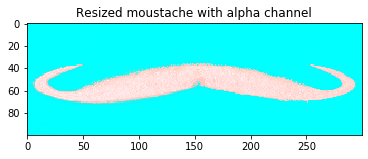

In [7]:
moresize = cv2.resize(moustache,(300,100))
plt.imshow(moresize[:,:,::-1]);plt.title ("Resized moustache with alpha channel")
print("Image Dimensions = {}\n".format(moresize.shape))

## Extract the original moustache image 

Image Dimensions = (100, 300, 3)



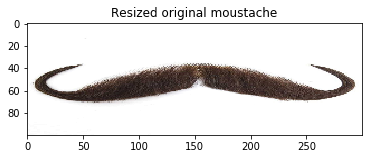

In [8]:
orMou = moresize[:,:,0:3]
plt.imshow(orMou[:,:,::-1]);plt.title ("Resized original moustache")
print("Image Dimensions = {}\n".format(orMou.shape))

## Extract alpha channel from the moustache image (Mask)

Image Dimensions = (100, 300)



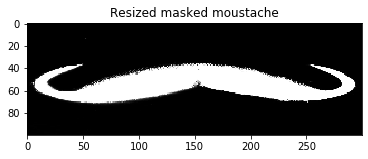

In [9]:
maskMou1 = moresize[:,:,3]
plt.imshow(maskMou1,cmap='gray');plt.title ("Resized masked moustache")
print("Image Dimensions = {}\n".format(maskMou1.shape))

## Do a naive replace to understand the dimension on where the moustache needs to be placed.

There are sophisticated algorithms that autodetect parts of the image, which can also be used.

Text(0.5, 1.0, " Region of Interest in Musk's image")

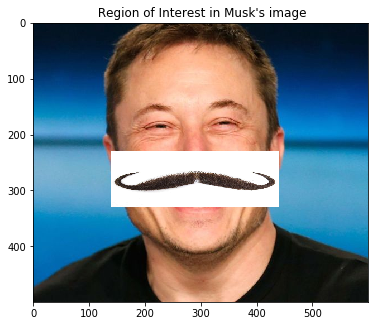

In [10]:
# Make a copy
muskwithmonaivereplace = musk.copy()

# add moustache
muskwithmonaivereplace[230:330,140:440]=orMou

plt.imshow(muskwithmonaivereplace[...,::-1]);plt.title(" Region of Interest in Musk's image")

## Create 3 channel image for the mask

In [13]:
maskMou = cv2.merge((maskMou1,maskMou1,maskMou1))

# Divide by 255, so the pixel values become 0 or 1
#maskMou = np.uint8(maskMou/255)

## Augment musk with masked moustache image

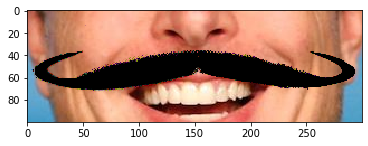

In [14]:
muskwithmoarith = musk.copy()

# get the moustance region
mROI = muskwithmoarith[230:330,140:440]

# use the mask image to create the masked moustache region
# for augmentation we use cv2.multiply 
# mutliply the region of interest with the region negated with the mask
#maskedmusk = cv2.multiply(mROI,(1-  maskMou ))
maskedmusk = cv2.bitwise_and(mROI,cv2.bitwise_not(maskMou))

plt.imshow(maskedmusk[...,::-1])

# Augment the orginal moustache image to the masked image

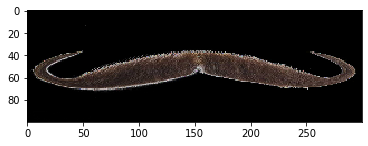

In [18]:
#maskedmous = cv2.multiply(orMou,maskMou)
maskedmous = cv2.bitwise_and(orMou,maskMou)
plt.imshow(maskedmous[...,::-1])

## Augment the masked Musk image with the Augmented moustache image

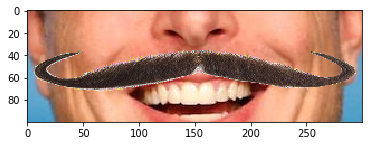

In [19]:
#mRoiFinal = cv2.add(maskedmusk, maskedmous)
mRoiFinal = cv2.bitwise_or(maskedmusk, maskedmous)
plt.imshow(mRoiFinal[...,::-1])

## Finally replace the region of interest with the Augmented image

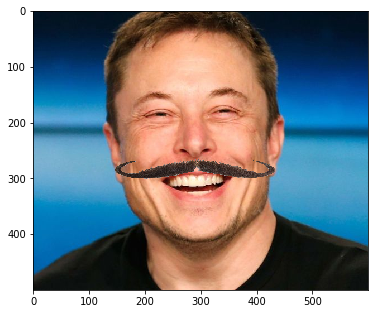

In [18]:
muskwithmoarith[230:330,140:440] = mRoiFinal
plt.imshow(muskwithmoarith[...,::-1])